In [6]:
import numpy as np
import matplotlib as mpl
mpl.use("Agg")
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
from matplotlib import pyplot as plt
%matplotlib notebook

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [72]:
BENCHMARKS_DIR = 'bifrost/test/benchmarks/'
SERIAL_BENCHMARKS_DIR = BENCHMARKS_DIR + 'performance_vs_serial/'

In [73]:
benchmarks_file = open(SERIAL_BENCHMARKS_DIR + 'benchmarks5.log.txt', 'r')
# FFT's/2, size multiplier, gulp size, gulp frame read, gulp frame fft, ..., ..., speedup
aws_benchmarks = np.genfromtxt(
    (",".join(ln.split(',')[1:-1]) for ln in benchmarks_file),
    dtype=np.float32,
    delimiter=',');

In [108]:
i_map = {
    'fft_number': 0,
    'size_multiplier': 1,
    'gulp_size': 2,
    'gulp_nframe_read': 3,
    'gulp_nframe_fft': 4,
    'bf_time': 5,
    'sk_time': 6,
    'speedup': 7
}

# Log 2 columns for easy display in imshow:

In [113]:
cur_benchmarks = np.copy(aws_benchmarks)
cur_benchmarks[:, i_map['gulp_size']] = np.log2(cur_benchmarks[:, i_map['gulp_size']]/32768)

x_axis = 'gulp_size'
y_axis = 'gulp_nframe_fft'

data_slice = {
    'fft_number': 1,
    'size_multiplier': 1,
    'gulp_nframe_read': 2
}

range_array = lambda ar: np.max(ar) - np.min(ar)

shape_display_x = int(range_array(rel_log_benchmarks[:, i_map[x_axis]]))
shape_display_y = int(range_array(rel_log_benchmarks[:, i_map[y_axis]]))

# Last axis is always x-axis in an imshow!
plot_shape = (shape_display_y, shape_display_x)

display_plot = np.zeros(plot_shape)

index_choice_list = [cur_benchmarks[:, i_map[key]] == data_slice[key] for key in data_slice.keys()]

indices = np.argwhere(cur_benchmarks[:, i_map['']])

# vert = 1st index = ... gulp frame
#vert_indices = rel_log_benchmarks[:, 1].astype(np.int)
#rel_display_plot[vert_indices, horiz_indices] = rel_log_benchmarks[:, 2]

# Chop off some rows
#rel_display_plot = np.copy(rel_display_plot[:-3, :])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

<IPython.core.display.Javascript object>


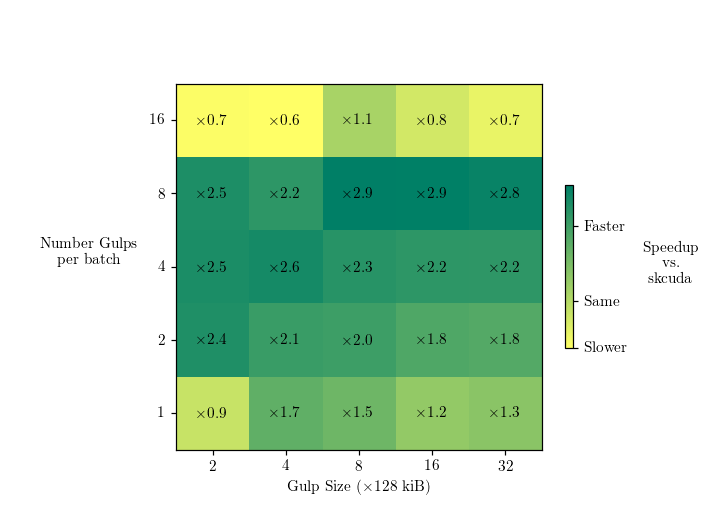

In [96]:
%matplotlib notebook
"""
fig, ax1 = plt.subplots(1,1)
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=np.min(rel_display_plot), vmax=np.max(rel_display_plot))
im = ax1.imshow(
    rel_display_plot.T,
    cmap='summer_r', origin='lower', norm=norm)
ax1.set_xticks([i for i in range(5)])
ax1.set_xticklabels([2**i for i in range(1, 6)])
ax1.set_xlabel(r'Gulp Size ($\times$128 kiB)')
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels([1, 2, 4, 8, 16])
ax1.set_ylabel(r'Number Gulps''\n'r'per batch',rotation=0, labelpad=40)
cbar = fig.colorbar(im, shrink=0.4, ticks=[np.min(rel_display_plot), 1.0, 2])
cbar.ax.set_yticklabels(['Slower', 'Same', 'Faster'])  # vertically oriented colorbar
cbar.ax.text(13, 0.4, 'Speedup\nvs.\nskcuda', rotation=0, 
        horizontalalignment='center')
for (j,i),label in np.ndenumerate(rel_display_plot.T):
    ax1.text(i, j, r'$\times$%.1f'%label, ha='center', va='center')

fig.subplots_adjust(left=0.25)
fig.savefig('bifrost/speedup.pdf', bbox_inches='tight')
"""

# Caption ideas

Should emphasize:
- This pipeline was not tuned in any way, it is vanilla Bifrost code, with no core bindings set, and no block fusion enabled.
- Not only do you get more speed for same effort, but you get greater functionality for same effort (bf.map!)
- Easy to switch it to a real-time pipeline for a telescope
- These plots aren't meant to show anything particular about when Bifrost is useful and when it isn't, they are supposed to show the trend of where Bifrost becomes very effective: large gulp sizes and large amounts of data.
- Bottom slower for Bifrost because of the greater Python overhead incurred from small gulp sizes. Small effort tuning gulp sizes eliminates this.
- Both pipelines are GPU-based FFT pipelines, controlled in Python. Similar (say exactly) source lines of code. Through pipeline-parallelism, Bifrost achieves a speedup using the same underlying cuFFT functionality.
- Emphasize that a hand-tuned C or C++ pipeline compiled with optimization can be faster than Bifrost. However, due to the development effort associated with writing a stream-processing pipeline by hand, Bifrost is a competitive alternative.